# [Huggins pitch](https://en.wikipedia.org/wiki/Dichotic_pitch)

- Huggins pitch is binaural pitch phenomenon, i.e., the pitch sensation occur as a result of binaural processing. If you listen to a single channel, no pitch sensation occur

- You can try to uncomment the code on the line 37 in order to present same signal to both ears, which means no pitch sensation will be perceived

```python
hpitch = [noise, fnoise]  # pitch sensationh
#hpitch = [noise, noise]  # no pitch sensation
```

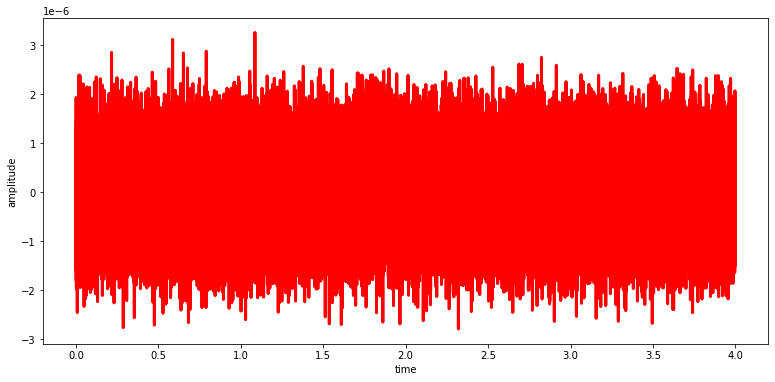

In [28]:


import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython.display as ipd   
    
Tdur = 4 # noise duration (seconds)
fs = 44100 # sample rate (Hz)
dt = 1/fs  # time step
tx = np.arange(0,Tdur,dt)  # time axis
freq = 0.5e3 # frequency of the huggins pitch

c = 0.03  #constant used in pole radius calculation
r = 1 - ((c*np.pi*freq)/fs)  #Radius of poles from the origin
b = [(r**2), -2*r*np.cos(2*np.pi*freq/fs), 1] #zeros of all pass filter
a = np.flipud(b); # poles are symmetric with corresponding zeros around the unit circle
nsamp = np.round(fs*Tdur)
#OP = np.zeros((np.round(fs*Tdur),2))
amp = 0.001 # amplitude of the noise
noise = amp*np.random.normal(0,1,nsamp) # broad band noise

# make a low pass filter up to 10 kHz to make the noise less annoying 
cutoff = 10e3 # cutoff frequency
normalCutoff = cutoff / (fs/2)
order = 15
bLP, aLP = signal.butter(order, normalCutoff, btype='low')

noise = signal.lfilter(bLP, aLP, noise)


fnoise = signal.lfilter(b, a, noise)


# you can 
hpitch = [noise, fnoise]  # pitch sensation
#hpitch = [noise, noise]  # no pitch sensation



ipd.display(ipd.Audio(hpitch, rate=fs))


fig, ax = plt.subplots(figsize=(13, 6))
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
     
ax.plot(tx, amp*noise, lw=3, c='r')


       
